Problem Statement:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural Calamities. Hence as a analyst, We need help the organisation in choosing the countries that are in dire need.


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

countryData= pd.read_csv('Country-data.csv')
print(countryData.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [50]:
countryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [51]:
countryData.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [52]:
round(100*(countryData.isnull().sum())/len(countryData), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

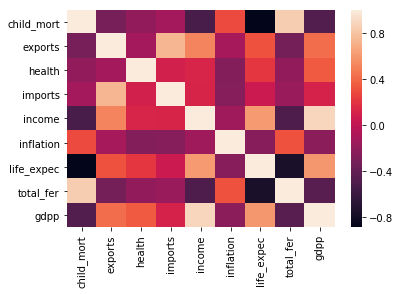

In [53]:


sns.heatmap(countryData.corr())

In [54]:
scaler = StandardScaler()

y=countryData.pop("country")
X=countryData.copy()
x = scaler.fit_transform(X)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
print(x[:5,:5])

[[ 1.29153238 -1.13827979  0.27908825 -0.08245496 -0.8082454 ]
 [-0.5389489  -0.47965843 -0.09701618  0.07083669 -0.3753689 ]
 [-0.27283273 -0.09912164 -0.96607302 -0.64176233 -0.22084447]
 [ 2.00780766  0.77538117 -1.44807093 -0.16531531 -0.58504345]
 [-0.69563412  0.1606679  -0.28689415  0.4975675   0.10173177]]


In [59]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(random_state=42)

In [63]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [64]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [65]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [66]:
import matplotlib.pyplot as plt

<BarContainer object of 9 artists>

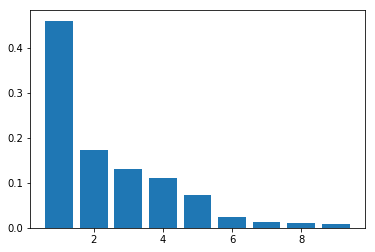

In [67]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [68]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

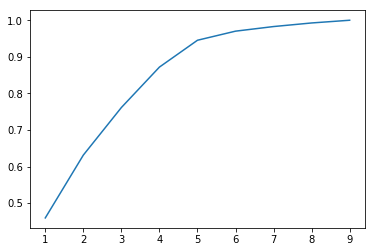

In [69]:
#Stree plot is used to learn the number of components required to explain maximum variance.
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [70]:
# Since 5 components explain 95% variance , we choose 5 variables.

pc2 = PCA(n_components=5, random_state=42)

In [71]:
newdata = pc2.fit_transform(x)

In [72]:
newdata.shape

(167, 5)

In [76]:
df = pd.DataFrame(newdata , columns=['PC1','PC2','PC3','PC4','PC5'])

df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


In [77]:
df_final = pd.concat([df, y], axis=1)

In [78]:
df_final.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


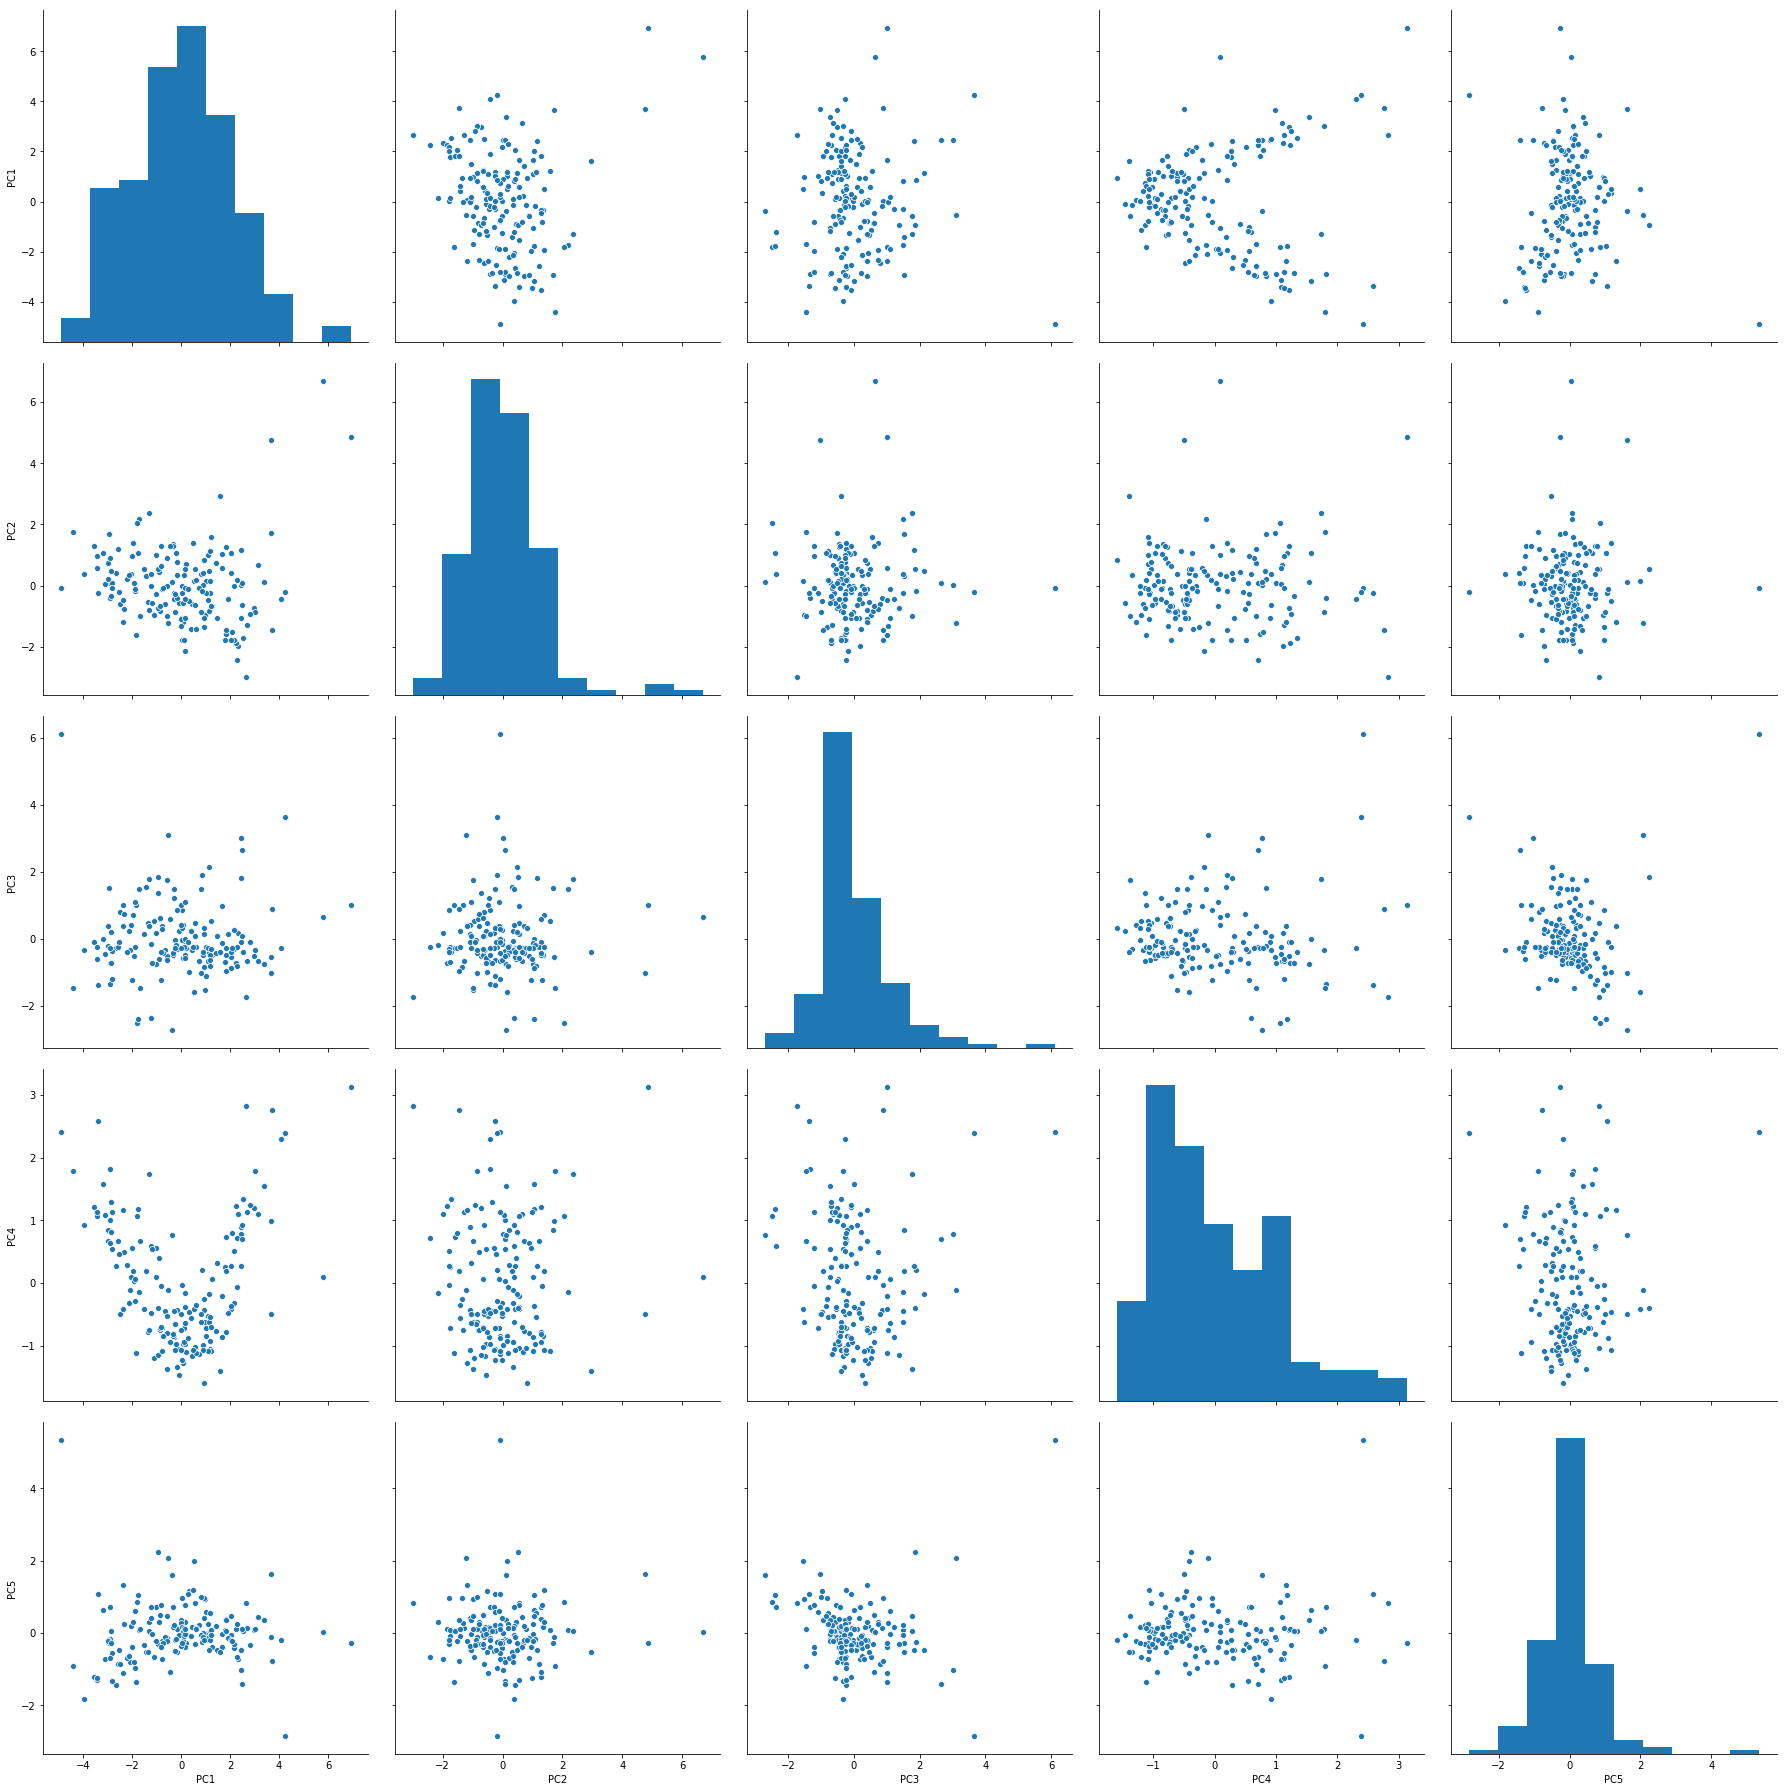

In [82]:
sns.pairplot(data=df_final, size=5)

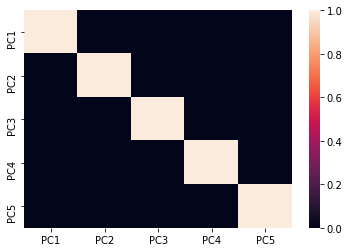

In [84]:
# to check if there are any correlations after performing pca
sns.heatmap(df_final.corr())

In [86]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
PC1        167 non-null float64
PC2        167 non-null float64
PC3        167 non-null float64
PC4        167 non-null float64
PC5        167 non-null float64
country    167 non-null object
dtypes: float64(5), object(1)
memory usage: 7.9+ KB


In [87]:
df_final.describe()

,PC1,PC2,PC3,PC4,PC5
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,1.329608e-17,5.517875e-17,-3.008239e-17,-2.725697e-17,8.310053e-18
std,2.039748e+00,1.247262e+00,1.085096e+00,1.000389e+00,8.152292e-01
min,-4.912066e+00,-2.997364e+00,-2.714085e+00,-1.595199e+00,-2.842158e+00
25%,-1.382270e+00,-7.520480e-01,-5.218776e-01,-7.837847e-01,-3.869916e-01
50%,2.240726e-02,-9.449868e-02,-2.456059e-01,-3.118565e-01,-5.599243e-02
75%,1.224328e+00,5.534747e-01,4.025451e-01,7.107253e-01,3.019087e-01
max,6.917755e+00,6.682090e+00,6.110158e+00,3.129643e+00,5.342700e+00


In [94]:
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

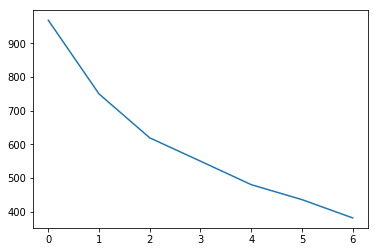

In [95]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

Silhouette analysis

 Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].


In [97]:

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.30441994992318155
For n_clusters=3, the silhouette score is 0.3079769786519014
For n_clusters=4, the silhouette score is 0.32421366852043376
For n_clusters=5, the silhouette score is 0.33042429059999706
For n_clusters=6, the silhouette score is 0.26192764132568525
For n_clusters=7, the silhouette score is 0.28141502457724643
For n_clusters=8, the silhouette score is 0.2739075894386556


In [98]:
# final model with k=5
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [99]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 4, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [100]:
df_final['cluster_id'] = kmeans.labels_
df_final.head()

,PC1,PC2,PC3,PC4,PC5,country,cluster_id
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan,1
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania,0
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria,0
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola,1
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda,0


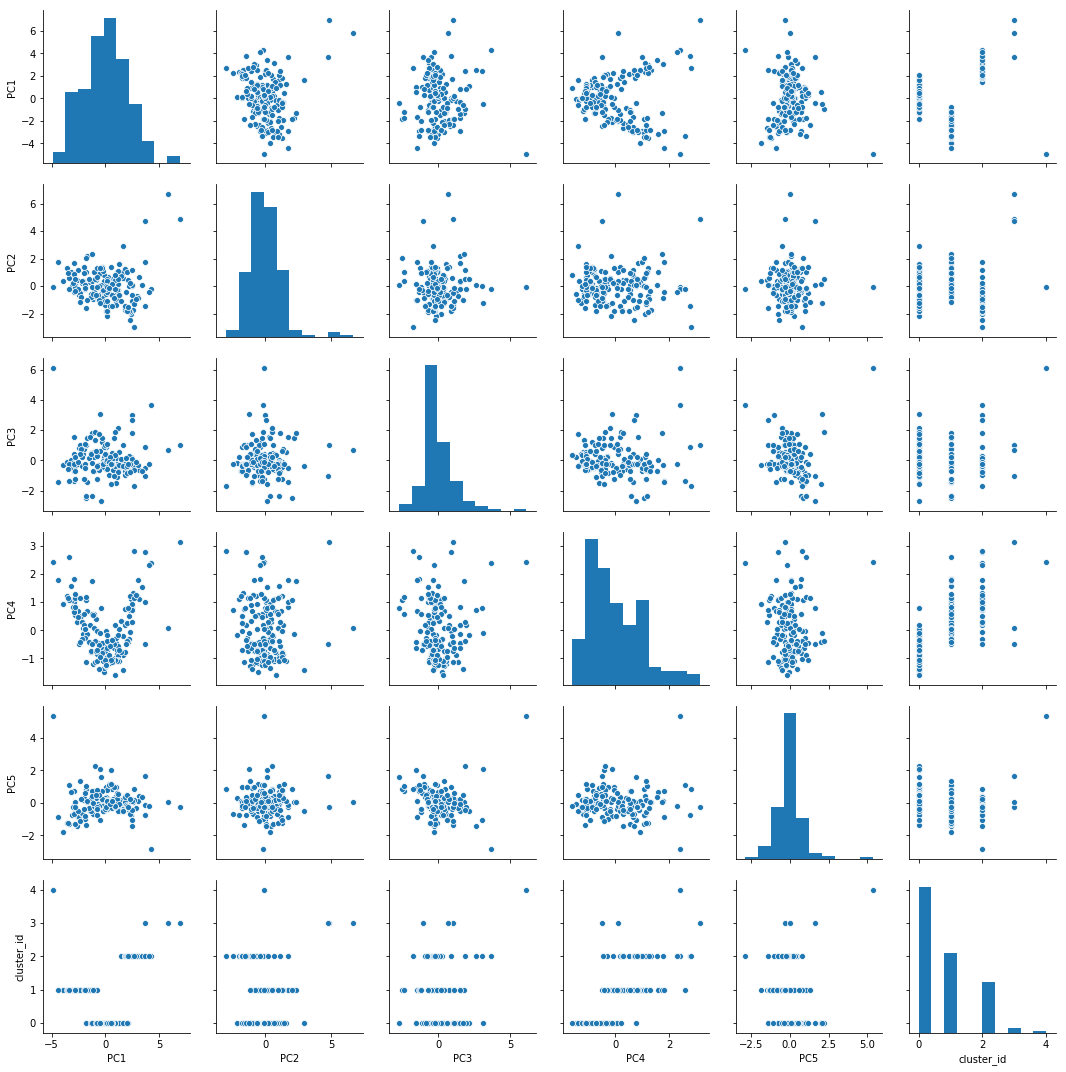

In [101]:
sns.pairplot(df_final)

In [102]:
df_final.shape

(167, 7)

In [103]:
countryData['cluster_id'] = kmeans.labels_
countryData.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


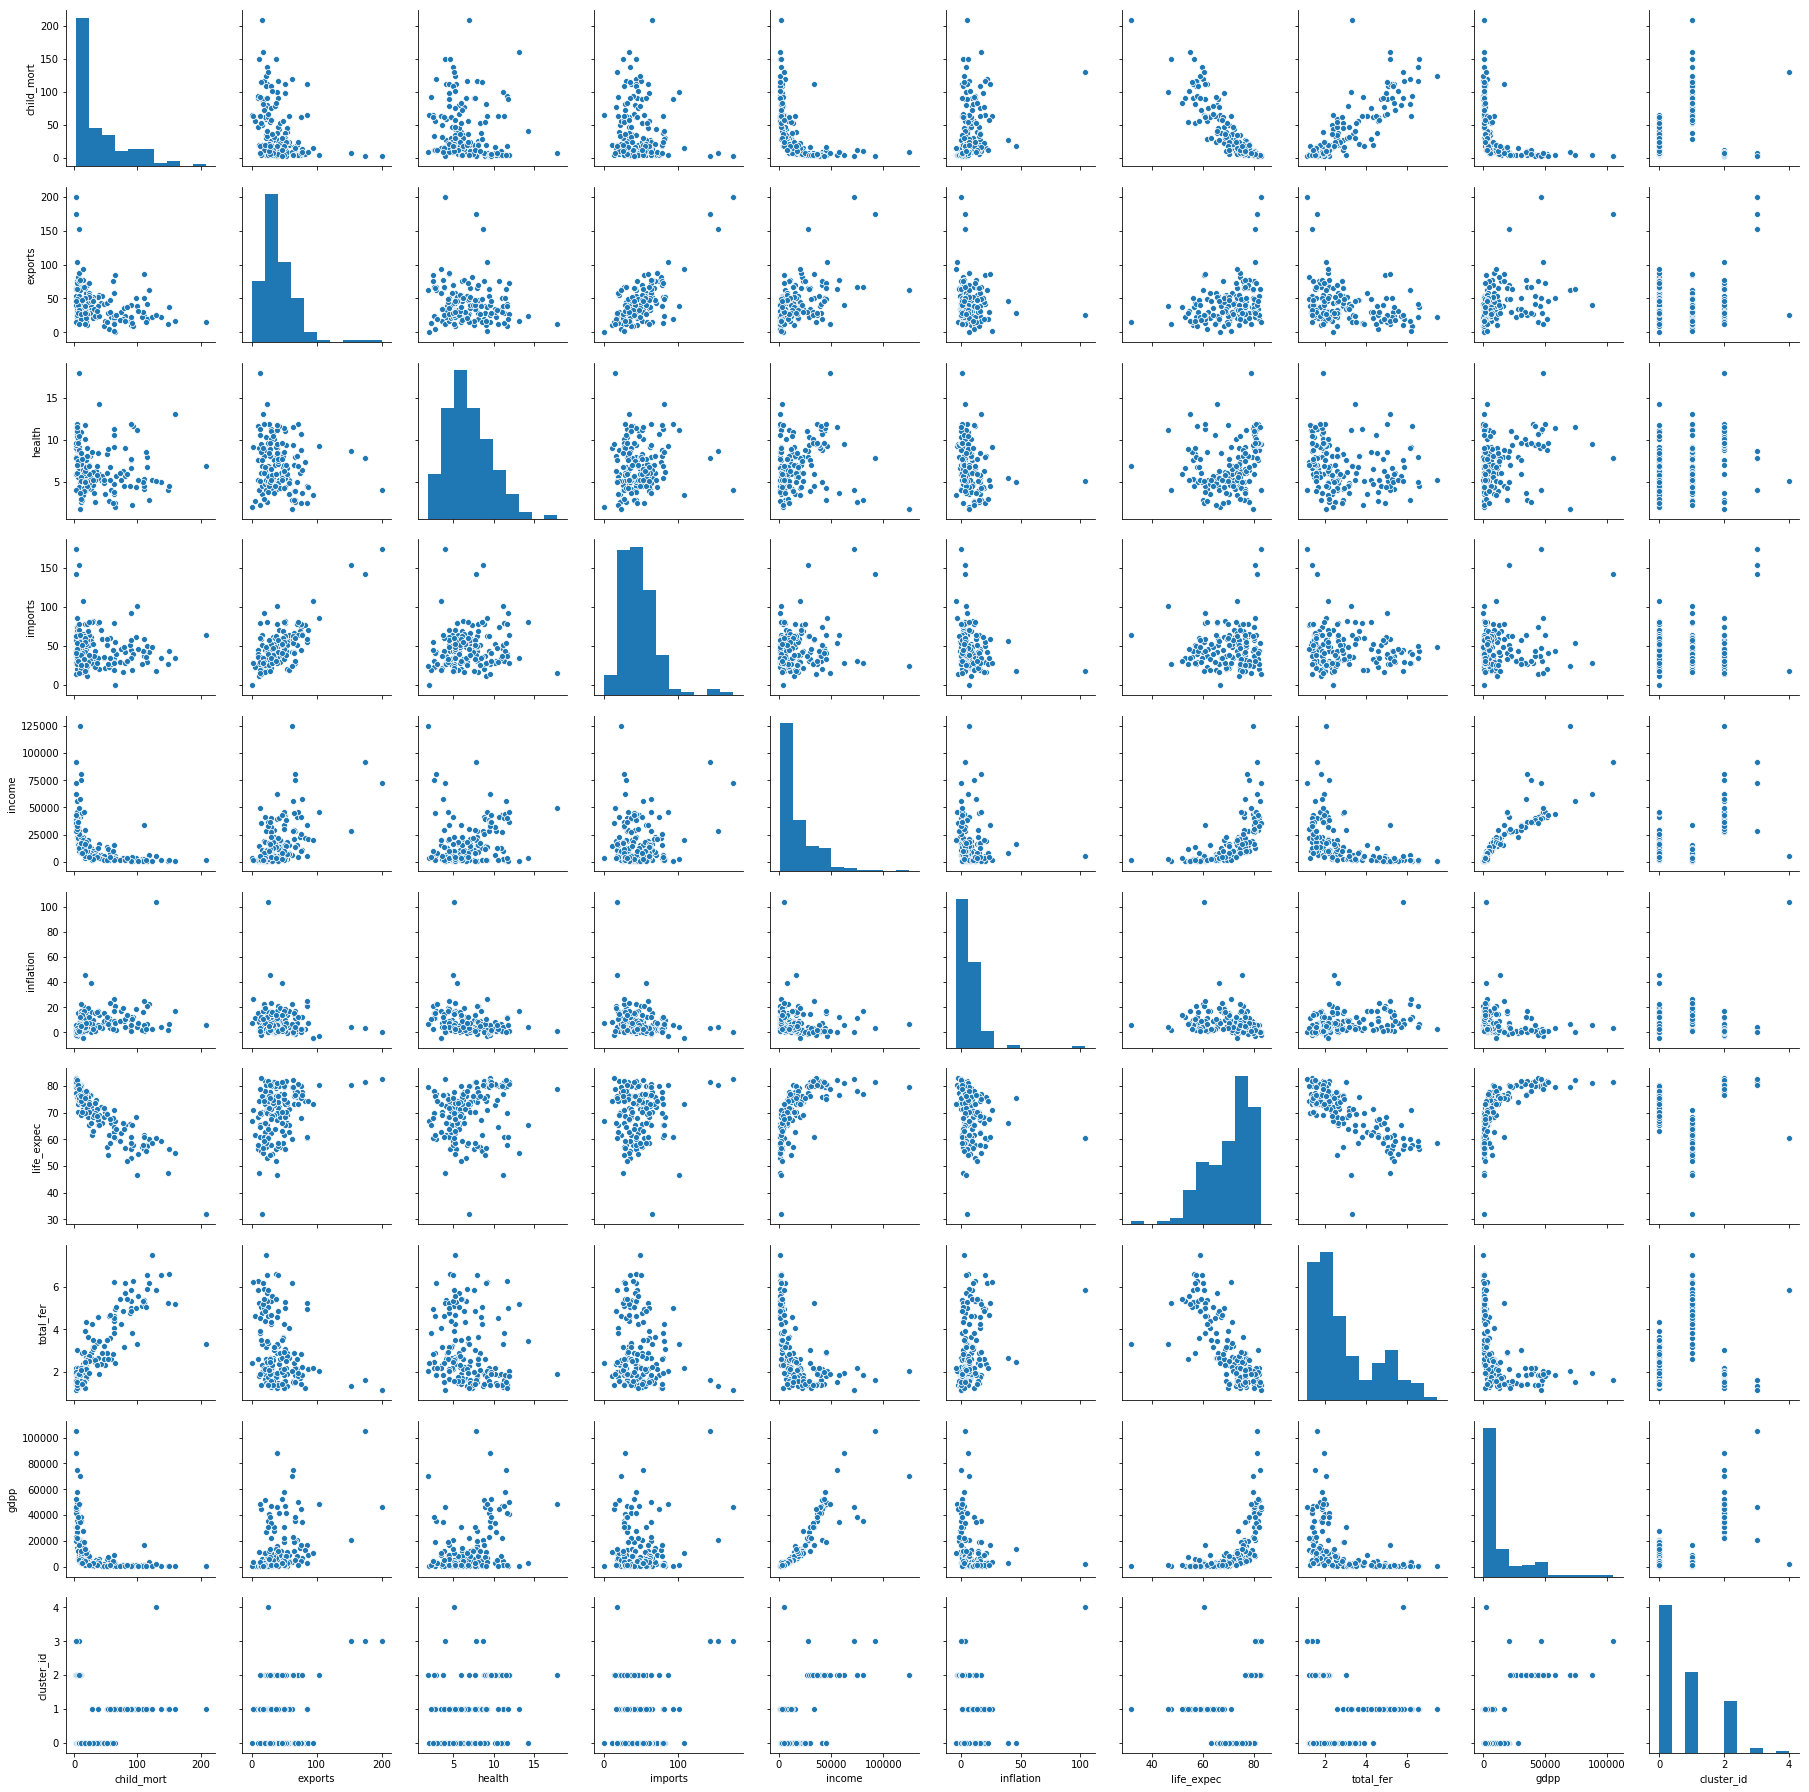

In [104]:
sns.pairplot(countryData)

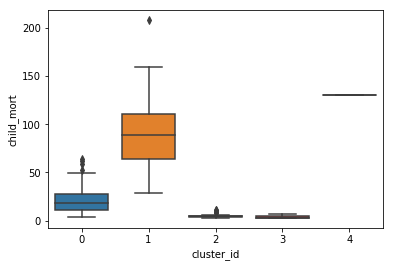

In [106]:
sns.boxplot(x='cluster_id', y='child_mort', data=countryData)

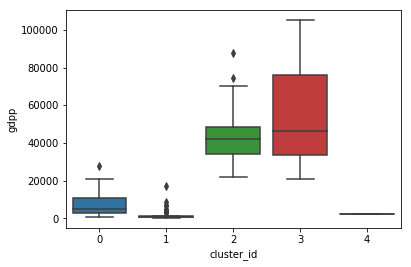

In [107]:
sns.boxplot(x='cluster_id', y='gdpp', data=countryData)

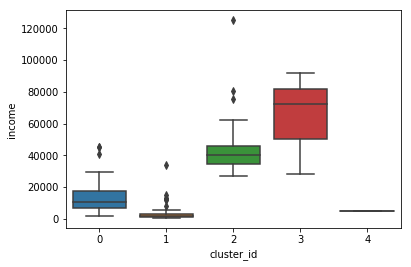

In [108]:

sns.boxplot(x='cluster_id', y='income', data=countryData)

In [110]:
countryData = pd.concat([countryData, y], axis=1)


### Inferences 

Looking at the box plots of clusters , we can see that 

1. cluster 4 has high child mortality, low gdp, low income
2. cluster 2 and 3 has low child mortality and high gdp and income
3. cluster 1 has low income , low gdp and high child mortality
4. Looking at column 0 , it has moderate income , gdp and child mortality compared to other clusters

Based on the above inferences, We can see that cluster 4 and 1 needs more financial support.

In [111]:
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


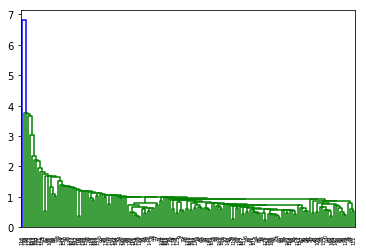

In [113]:
# single linkage
mergings = linkage(df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

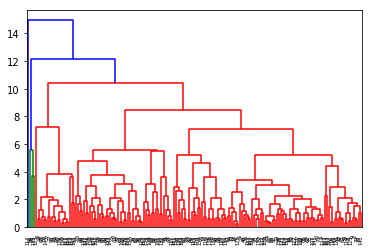

In [115]:
# complete linkage
mergings = linkage(df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [116]:
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 0, 4, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0])

In [117]:
# assign cluster labels
countryData['cluster_labels'] = cluster_labels
countryData.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country,cluster_labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Afghanistan,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Albania,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Algeria,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Angola,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Antigua and Barbuda,1


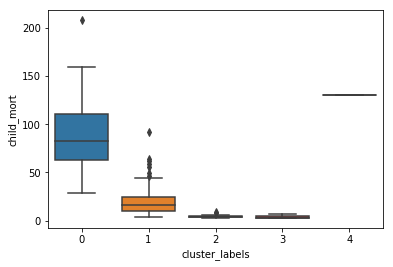

In [119]:
sns.boxplot(x='cluster_labels', y='child_mort', data=countryData)

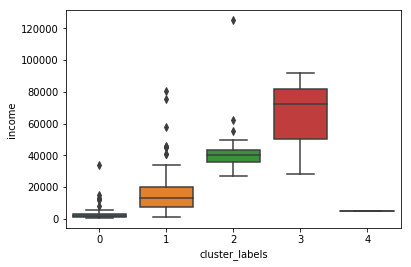

In [121]:
sns.boxplot(x='cluster_labels', y='income', data=countryData)

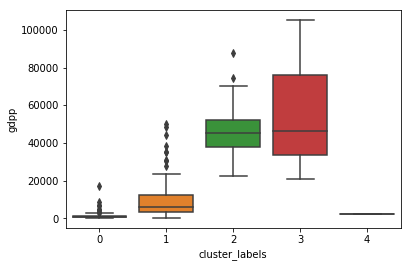

In [122]:
sns.boxplot(x='cluster_labels', y='gdpp', data=countryData)

### Inferences 

It is similar to kmeans clustering algorithm.Looking at the box plots of clusters , we can see that 

1. cluster 4 has high child mortality, low gdp, low income
2. cluster 2 and 3 has low child mortality and high gdp and income
3. cluster 0 has low income , low gdp and high child mortality
4. Looking at column 1 , it has moderate income , gdp and child mortality compared to other clusters

Based on the above inferences, We can see that cluster 4 and 1 needs more financial support.

In [136]:
# lets filter out the countries wrt cluster_id =0 and 4

filteredCountryData= countryData[(countryData['cluster_id'] == 1) | (countryData['cluster_id'] == 4)]

In [138]:
filteredCountryData.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country,cluster_labels
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,Afghanistan,0
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,Angola,0
17,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1,Benin,0
21,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1,Botswana,0
25,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1,Burkina Faso,0


In [143]:
filteredCountryData=filteredCountryData.sort_values(by=['child_mort', 'gdpp', 'income'] , ascending=False).reset_index() 
filteredCountryData.head(15)

,level_0,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country,cluster_labels
0,0,66,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662,1,Haiti,0
1,1,132,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399,1,Sierra Leone,0
2,2,32,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897,1,Chad,0
3,3,31,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,1,Central African Republic,0
4,4,97,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708,1,Mali,0
5,5,113,130.0,25.3,5.07,17.4,5150,104.000,60.5,5.84,2330,4,Nigeria,4
6,6,112,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348,1,Niger,0
7,7,3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,Angola,0
8,8,25,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1,Burkina Faso,0
9,9,37,116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,1,"Congo, Dem. Rep.",0


In [144]:
filteredCountryData['country'][:15]

0                        Haiti
1                 Sierra Leone
2                         Chad
3     Central African Republic
4                         Mali
5                      Nigeria
6                        Niger
7                       Angola
8                 Burkina Faso
9             Congo, Dem. Rep.
10               Guinea-Bissau
11           Equatorial Guinea
12               Cote d'Ivoire
13                       Benin
14                      Guinea
Name: country, dtype: object

### Output

From the analysis, We found that 

Haiti Seirra Leone, chad, Central Afrian Republic, Mali,Nigeria, Niger,Angola, Burking Faso, Congo, Guinea-Bissau,equatorial guina,cote d'Ivoire , Benin, Guinea

And also, We have not done any outliers analysis  because all country gdpp, income and child_mort is important.